### Importing Required Libraries

In [1]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMG_SIZE = [244,244,3]

In [3]:
train_path = 'Images/Train'
valid_path = 'Images/Test'

### Pre-Trained Model (VGG16)

In [4]:
vgg_16 = VGG16(input_shape=IMG_SIZE,weights='imagenet',include_top=False)

In [5]:
for layer in vgg_16.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of classes
folders = glob('Images/Train/*')

# our layers - you can add more if you want
x = Flatten()(vgg_16.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [7]:
folders

['Images/Train\\Karthik', 'Images/Train\\Naidu', 'Images/Train\\Usha']

In [8]:
model = Model(inputs=vgg_16.input,outputs=prediction)

### Model Summary

In [9]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 244, 244, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 244, 244, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 244, 244, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 122, 122, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 122, 122, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 122, 122, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 61, 61, 128)      

### Compiling Model 

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

## Data Augumentation

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Images/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Images/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 720 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


In [12]:
result = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
23/23 [==============================] - 26s 1s/step - loss: 0.2754 - accuracy: 0.8903 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 2/20
23/23 [==============================] - 15s 672ms/step - loss: 0.0039 - accuracy: 0.9986 - val_loss: 3.1338e-04 - val_accuracy: 1.0000
Epoch 3/20
23/23 [==============================] - 15s 656ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 2.2865e-04 - val_accuracy: 1.0000
Epoch 4/20
23/23 [==============================] - 17s 718ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.2852e-04 - val_accuracy: 1.0000
Epoch 5/20
23/23 [==============================] - 17s 726ms/step - loss: 9.5890e-04 - accuracy: 1.0000 - val_loss: 1.9630e-04 - val_accuracy: 1.0000
Epoch 6/20
23/23 [==============================] - 16s 694ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.5765e-04 - val_accuracy: 1.0000
Epoch 7/20
23/23 [===========================

### Visualizing Training Loss and Validation Loss

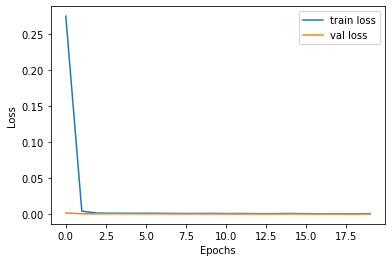

<Figure size 432x288 with 0 Axes>

In [13]:
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

### Visualizing Training Accuracy and Validation Accuracy

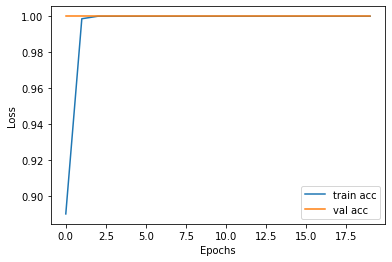

<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot(result.history['accuracy'], label='train acc')
plt.plot(result.history['val_accuracy'], label='val acc')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

### Saving Model 

In [15]:
from tensorflow.keras.models import load_model
model.save('face_rec_model.h5')